# Reading the small project data into Python

This file will show how to read the data from the files `train.h5` and `test.h5` into Python, for training.
The files are available at:

<https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/train.h5>

<https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/test.h5>

We start by opening the files and loading them into a Numpy array

In [38]:
import h5py
import pandas
from copy import deepcopy
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [40]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pandas.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

Then we can verify the shape

In [41]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


As expected, the test set contains 2 columns less: `Truth` and `p_truth_E`.
    
Then we copy the variable list from the course website <https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/VariableList.html>

In [42]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

Finally, we divide the training data into data (`X`) and labels (`y`)

In [43]:
X = train[all_variables]
y = train['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

Shape of X: (162500, 160)
Shape of y: (162500,)


In [44]:
X.head(1)

,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,p_pt_track,p_eta,...,p_E5x7_Lr0,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1
0,26.5,26.5,26.5,26.5,26.5,26.5,18,3,42011.792969,1.834715,...,215.588013,43402.332031,74045.820312,337.980713,273.708801,43091.683594,74447.539062,470.177124,273.708801,43091.683594


In [45]:
target_count = y.value_counts()

Proportion: 2.96 : 1


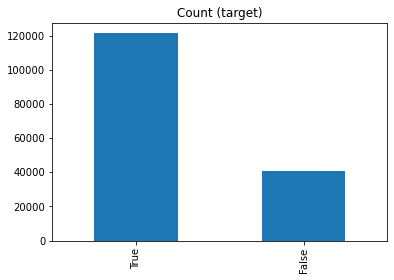

In [46]:
print('Proportion:', round(target_count[1] / target_count[0], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Preprocessing

### Check null values

In [47]:
train.isnull().sum()

eventNumber                       0
runNumber                         0
actualInteractionsPerCrossing     0
averageInteractionsPerCrossing    0
correctedActualMu                 0
                                 ..
p_E7x11_Lr2                       0
p_E7x11_Lr3                       0
p_E7x7_Lr0                        0
p_E7x7_Lr1                        0
index                             0
Length: 166, dtype: int64

No nulls
### Scale the data

In [48]:
transformed_X = deepcopy(X) 
# This loop transforms every variable _independently_ 
for variable in X.columns:     
    transformed_X[variable] = RobustScaler().fit_transform(np.array(transformed_X[variable]).reshape(-1,1))

### Select k Best features

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression

In [50]:
X_25 = SelectKBest(score_func=f_regression, k=25).fit_transform(X, y)
X_25.shape

/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


(162500, 25)

## Bayesian optimisation of hyperparameters and cross validation

In [51]:
def GBC_CrossValidation(n_estimators, learning_rate, max_depth, data, targets):
    """Decision Tree cross validation.
       Fits a Decision Tree with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations
       that maximize the accuracy
    """
    
    estimator = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, 
                                 max_depth=max_depth, random_state=0)
    
    cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=5)
    
    return cval.mean()

In [52]:
def optimize_GBC(data, targets, pars, n_iter=5):
    """Apply Bayesian Optimization to Decision Tree parameters."""
    
    def crossval_wrapper(n_estimators, learning_rate, max_depth):
        """Wrapper of Decision Tree cross validation. 
           max_depth and n_estimators
           are cast to integer before we pass them along.
        """
        return GBC_CrossValidation(n_estimators=int(n_estimators), 
                                            learning_rate=learning_rate, 
                                            max_depth=int(max_depth),
                                            data=data, 
                                            targets=targets)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=42, 
                                     verbose=2)
    optimizer.maximize(init_points=4, n_iter=n_iter)

    return optimizer

In [55]:
parameters_BayesianOptimization = {"learning_rate": (0.0001, 1), 
                                   "max_depth": (1, 5),
                                   "n_estimators": (50,500)
                                  }

BayesianOptimization = optimize_GBC(X_25, 
                                             y, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------


KeyboardInterrupt: 

Cross-validation on result:

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=int(BayesianOptimization.max['params']['n_estimators']), 
                                 learning_rate=BayesianOptimization.max['params']['learning_rate'], 
                                 max_depth=BayesianOptimization.max['params']['max_depth'], 
                                 random_state=0)
scores = cross_val_score(gbc, features_data, targets_data, cv=5, scoring='f1') 
print(f"{scores.mean():.4f} accuracy with a standard deviation of {scores.std():.4f}")

## LightGBM

In [65]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

data_train = lgb.Dataset(X_25, label=y)
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'learning_rate': 0.01,
          'num_leaves': 10,
          'max_depth': 10,
          'min_data': 10,
          'verbose': 0,
          'force_col_wise': True}

#lgb_clf = lgb.train(params, train_set=data_train, num_boost_round=300)
#lgb.cv(params, data_train, num_boost_round=300, nfold=5)


# y_pred = np.around(lgb_clf.predict(test_X))
# acc = accuracy_score(y_pred, test_y)
# print(f"Train accuracy: {acc*100.0:.2f}%")

# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X, y)


Accuracy: 0.945 (0.002)


LGBMClassifier()

In [68]:
import optuna
from optuna.samplers import TPESampler
from optuna.integration import LightGBMPruningCallback
from optuna.pruners import MedianPruner
import lightgbm as lgb

#%%

lgb_data_train = lgb.Dataset(X_25, label=y)


#%%


def objective(trial):

    boosting_types = ["gbdt", "rf", "dart"]
    boosting_type = trial.suggest_categorical("boosting_type", boosting_types)

    params = {
        "objective": "binary",
        "boosting": boosting_type,
        "max_depth": trial.suggest_int("max_depth", 2, 63),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 1e-5, 10),
        "scale_pos_weight": trial.suggest_uniform("scale_pos_weight", 10.0, 30.0),
    }

    N_iterations_max = 10_000
    early_stopping_rounds = 50

    if boosting_type == "dart":
        N_iterations_max = 100
        early_stopping_rounds = None

    cv_res = lgb.cv(
        params,
        lgb_data_train,
        num_boost_round=N_iterations_max,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False,
        seed=42,
        callbacks=[LightGBMPruningCallback(trial, "auc")],
    )

    num_boost_round = len(cv_res["auc-mean"])
    trial.set_user_attr("num_boost_round", num_boost_round)
    return cv_res["auc-mean"][-1]


#%%

study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=50),
)



[I 2021-05-18 21:24:00,526] A new study created in memory with name: no-name-90644af8-9d8c-4442-aebb-bc1c9c0bbdda


In [69]:
study.optimize(objective, n_trials=100, show_progress_bar=True)

/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 97196, number of negative: 32804
[W 2021-05-18 21:24:04,518] Trial 0 failed because of the following error: LightGBMError('Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /tmp/pip-req-build-12fs9jsp/compile/src/boosting/rf.hpp, line 35 .\n')
Traceback (most recent call last):
  File "/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/optuna/_optimize.py", line 217, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-68-205b099d44e5>", line 35, in objective
    cv_res

LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /tmp/pip-req-build-12fs9jsp/compile/src/boosting/rf.hpp, line 35 .


In [71]:
from sklearn.model_selection import KFold

import optuna.integration.lightgbm as lgb


dtrain = lgb.Dataset(X_25, label=y)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

tuner = lgb.LightGBMTunerCV(
    params, dtrain, verbose_eval=100, early_stopping_rounds=100, folds=KFold(n_splits=3)
)

tuner.run()

print("Best score:", tuner.best_score)
best_params = tuner.best_params
print("Best params:", best_params)
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

[I 2021-05-18 21:33:29,057] A new study created in memory with name: no-name-23d47559-445c-4e49-937a-96a33148497d
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[100]	cv_agg's binary_logloss: 0.199934 + 0.00204356
[200]	cv_agg's binary_logloss: 0.200135 + 0.00222527


feature_fraction, val_score: 0.199827:  14%|#4        | 1/7 [00:10<01:02, 10.40s/it]

[100]	cv_agg's binary_logloss: 0.200187 + 0.0015435
[200]	cv_agg's binary_logloss: 0.200288 + 0.00159566


feature_fraction, val_score: 0.199827:  29%|##8       | 2/7 [00:20<00:50, 10.17s/it]

[100]	cv_agg's binary_logloss: 0.200153 + 0.00196491
[200]	cv_agg's binary_logloss: 0.20073 + 0.00217583


feature_fraction, val_score: 0.199827:  43%|####2     | 3/7 [00:31<00:41, 10.44s/it]

[100]	cv_agg's binary_logloss: 0.200031 + 0.00158127
[200]	cv_agg's binary_logloss: 0.200443 + 0.0015945


feature_fraction, val_score: 0.199827:  57%|#####7    | 4/7 [00:42<00:32, 10.78s/it]

[100]	cv_agg's binary_logloss: 0.200082 + 0.00157605
[200]	cv_agg's binary_logloss: 0.200409 + 0.00155967


feature_fraction, val_score: 0.199827:  71%|#######1  | 5/7 [00:55<00:23, 11.56s/it]

[100]	cv_agg's binary_logloss: 0.200205 + 0.00187399
[200]	cv_agg's binary_logloss: 0.200483 + 0.00203336


feature_fraction, val_score: 0.199827:  86%|########5 | 6/7 [01:07<00:11, 11.62s/it]

[100]	cv_agg's binary_logloss: 0.200015 + 0.00160976
[200]	cv_agg's binary_logloss: 0.20046 + 0.00182441


num_leaves, val_score: 0.199827:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's binary_logloss: 0.200853 + 0.00162113
[200]	cv_agg's binary_logloss: 0.201073 + 0.00244537


num_leaves, val_score: 0.199827:   5%|5         | 1/20 [00:08<02:50,  8.97s/it]

[100]	cv_agg's binary_logloss: 0.201939 + 0.00160417


num_leaves, val_score: 0.199827:  10%|#         | 2/20 [00:21<03:15, 10.86s/it]

[100]	cv_agg's binary_logloss: 0.202529 + 0.00156883


num_leaves, val_score: 0.199827:  15%|#5        | 3/20 [00:34<03:22, 11.92s/it]

[100]	cv_agg's binary_logloss: 0.201383 + 0.00140915


num_leaves, val_score: 0.199827:  20%|##        | 4/20 [00:44<02:56, 11.04s/it]

[100]	cv_agg's binary_logloss: 0.201829 + 0.00176499


num_leaves, val_score: 0.199827:  25%|##5       | 5/20 [00:55<02:46, 11.08s/it]

[100]	cv_agg's binary_logloss: 0.202386 + 0.0016953


num_leaves, val_score: 0.199827:  30%|###       | 6/20 [01:06<02:37, 11.27s/it]

[100]	cv_agg's binary_logloss: 0.201476 + 0.00171751


num_leaves, val_score: 0.199827:  35%|###5      | 7/20 [01:17<02:23, 11.05s/it]

[100]	cv_agg's binary_logloss: 0.205979 + 0.00188713


num_leaves, val_score: 0.199827:  40%|####      | 8/20 [01:33<02:32, 12.75s/it]

[100]	cv_agg's binary_logloss: 0.204806 + 0.00185851


num_leaves, val_score: 0.199827:  45%|####5     | 9/20 [01:52<02:41, 14.67s/it]

[100]	cv_agg's binary_logloss: 0.200251 + 0.00147992


num_leaves, val_score: 0.199827:  50%|#####     | 10/20 [02:02<02:13, 13.32s/it]

[100]	cv_agg's binary_logloss: 0.211556 + 0.00135825
[200]	cv_agg's binary_logloss: 0.207374 + 0.00170799
[300]	cv_agg's binary_logloss: 0.205358 + 0.00184946
[400]	cv_agg's binary_logloss: 0.204293 + 0.00183058
[500]	cv_agg's binary_logloss: 0.20348 + 0.00191101
[600]	cv_agg's binary_logloss: 0.20274 + 0.00179596
[700]	cv_agg's binary_logloss: 0.202183 + 0.00178519
[800]	cv_agg's binary_logloss: 0.201949 + 0.00173526
[900]	cv_agg's binary_logloss: 0.20177 + 0.00173593


num_leaves, val_score: 0.199827:  55%|#####5    | 11/20 [02:26<02:29, 16.58s/it]

[1000]	cv_agg's binary_logloss: 0.201545 + 0.00169926
[100]	cv_agg's binary_logloss: 0.211556 + 0.00135825
[200]	cv_agg's binary_logloss: 0.207374 + 0.00170799
[300]	cv_agg's binary_logloss: 0.205358 + 0.00184946
[400]	cv_agg's binary_logloss: 0.204293 + 0.00183058
[500]	cv_agg's binary_logloss: 0.20348 + 0.00191101
[600]	cv_agg's binary_logloss: 0.20274 + 0.00179596
[700]	cv_agg's binary_logloss: 0.202183 + 0.00178519
[800]	cv_agg's binary_logloss: 0.201949 + 0.00173526
[900]	cv_agg's binary_logloss: 0.20177 + 0.00173593


num_leaves, val_score: 0.199827:  60%|######    | 12/20 [02:49<02:26, 18.28s/it]

[1000]	cv_agg's binary_logloss: 0.201545 + 0.00169926
[100]	cv_agg's binary_logloss: 0.200269 + 0.00166579


num_leaves, val_score: 0.199827:  65%|######5   | 13/20 [02:58<01:49, 15.65s/it]

[100]	cv_agg's binary_logloss: 0.200055 + 0.00167431


num_leaves, val_score: 0.199827:  70%|#######   | 14/20 [03:08<01:22, 13.77s/it]

[100]	cv_agg's binary_logloss: 0.199893 + 0.00175354


num_leaves, val_score: 0.199827:  75%|#######5  | 15/20 [03:16<01:00, 12.16s/it]

[200]	cv_agg's binary_logloss: 0.201229 + 0.00138715


[I 2021-05-18 21:38:01,439] Trial 21 finished with value: 0.19984035517210633 and parameters: {'num_leaves': 28}. Best is trial 21 with value: 0.19984035517210633.
num_leaves, val_score: 0.199827:  75%|#######5  | 15/20 [03:16<01:00, 12.16s/it]

[100]	cv_agg's binary_logloss: 0.200217 + 0.00184307


num_leaves, val_score: 0.199827:  80%|########  | 16/20 [03:27<00:47, 11.80s/it]

[100]	cv_agg's binary_logloss: 0.203634 + 0.00175931


num_leaves, val_score: 0.199827:  85%|########5 | 17/20 [03:43<00:39, 13.07s/it]

[100]	cv_agg's binary_logloss: 0.201017 + 0.00182511


num_leaves, val_score: 0.199827:  90%|######### | 18/20 [03:53<00:24, 12.26s/it]

[100]	cv_agg's binary_logloss: 0.200092 + 0.00184164
[200]	cv_agg's binary_logloss: 0.200395 + 0.00172261


num_leaves, val_score: 0.199827:  95%|#########5| 19/20 [04:03<00:11, 11.58s/it]

[100]	cv_agg's binary_logloss: 0.200192 + 0.00168863
[200]	cv_agg's binary_logloss: 0.200306 + 0.00220029


bagging, val_score: 0.199827:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's binary_logloss: 0.200159 + 0.00161787


bagging, val_score: 0.199827:  10%|#         | 1/10 [00:11<01:43, 11.49s/it]

[100]	cv_agg's binary_logloss: 0.199879 + 0.00167266
[200]	cv_agg's binary_logloss: 0.200431 + 0.00179541


bagging, val_score: 0.199827:  20%|##        | 2/10 [00:23<01:35, 11.93s/it]

[100]	cv_agg's binary_logloss: 0.200282 + 0.00178974


bagging, val_score: 0.199827:  30%|###       | 3/10 [00:33<01:16, 10.97s/it]

[100]	cv_agg's binary_logloss: 0.200212 + 0.00156625


bagging, val_score: 0.199827:  40%|####      | 4/10 [00:43<01:04, 10.72s/it]

[100]	cv_agg's binary_logloss: 0.200614 + 0.00172895


bagging, val_score: 0.199827:  50%|#####     | 5/10 [00:53<00:51, 10.30s/it]

[100]	cv_agg's binary_logloss: 0.201259 + 0.00159828


bagging, val_score: 0.199827:  60%|######    | 6/10 [01:01<00:38,  9.60s/it]

[100]	cv_agg's binary_logloss: 0.200916 + 0.00153861


bagging, val_score: 0.199827:  70%|#######   | 7/10 [01:10<00:28,  9.42s/it]

[100]	cv_agg's binary_logloss: 0.200445 + 0.00141036


bagging, val_score: 0.199827:  80%|########  | 8/10 [01:21<00:19,  9.84s/it]

[100]	cv_agg's binary_logloss: 0.201362 + 0.00164787


bagging, val_score: 0.199827:  90%|######### | 9/10 [01:36<00:11, 11.32s/it]

[100]	cv_agg's binary_logloss: 0.200529 + 0.0017746


feature_fraction_stage2, val_score: 0.199827:   0%|          | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's binary_logloss: 0.20006 + 0.00161022


feature_fraction_stage2, val_score: 0.199827:  17%|#6        | 1/6 [00:07<00:35,  7.03s/it]

[200]	cv_agg's binary_logloss: 0.200596 + 0.00213426
[100]	cv_agg's binary_logloss: 0.200232 + 0.00160317
[200]	cv_agg's binary_logloss: 0.20063 + 0.00178753


feature_fraction_stage2, val_score: 0.199827:  33%|###3      | 2/6 [00:18<00:38,  9.57s/it]

[100]	cv_agg's binary_logloss: 0.199934 + 0.00204356
[200]	cv_agg's binary_logloss: 0.200135 + 0.00222527


feature_fraction_stage2, val_score: 0.199827:  50%|#####     | 3/6 [00:51<01:01, 20.36s/it]

[100]	cv_agg's binary_logloss: 0.199969 + 0.00167414
[200]	cv_agg's binary_logloss: 0.200858 + 0.00188272


feature_fraction_stage2, val_score: 0.199827:  67%|######6   | 4/6 [01:18<00:46, 23.02s/it]

[100]	cv_agg's binary_logloss: 0.20006 + 0.00161022
[200]	cv_agg's binary_logloss: 0.200596 + 0.00213426


feature_fraction_stage2, val_score: 0.199827:  83%|########3 | 5/6 [01:24<00:16, 16.68s/it]

[100]	cv_agg's binary_logloss: 0.199969 + 0.00167414


regularization_factors, val_score: 0.199827:   0%|          | 0/20 [00:00<?, ?it/s]

[200]	cv_agg's binary_logloss: 0.200858 + 0.00188272
[100]	cv_agg's binary_logloss: 0.199903 + 0.0016961
[200]	cv_agg's binary_logloss: 0.2 + 0.00183455


regularization_factors, val_score: 0.199784:   5%|5         | 1/20 [00:07<02:13,  7.04s/it]

[100]	cv_agg's binary_logloss: 0.199903 + 0.00164724
[200]	cv_agg's binary_logloss: 0.200407 + 0.0017336


regularization_factors, val_score: 0.199781:  10%|#         | 2/20 [00:13<02:02,  6.79s/it]

[100]	cv_agg's binary_logloss: 0.199827 + 0.0017411
[200]	cv_agg's binary_logloss: 0.199914 + 0.00172366


regularization_factors, val_score: 0.199684:  15%|#5        | 3/20 [00:20<01:58,  6.96s/it]

[100]	cv_agg's binary_logloss: 0.199675 + 0.00181263
[200]	cv_agg's binary_logloss: 0.20007 + 0.00177301


regularization_factors, val_score: 0.199635:  20%|##        | 4/20 [00:28<01:52,  7.05s/it]

[100]	cv_agg's binary_logloss: 0.199934 + 0.00204356
[200]	cv_agg's binary_logloss: 0.200114 + 0.00224172


regularization_factors, val_score: 0.199635:  25%|##5       | 5/20 [00:34<01:44,  6.99s/it]

[100]	cv_agg's binary_logloss: 0.199996 + 0.00186601
[200]	cv_agg's binary_logloss: 0.200321 + 0.00189798


regularization_factors, val_score: 0.199635:  30%|###       | 6/20 [00:41<01:36,  6.87s/it]

[100]	cv_agg's binary_logloss: 0.199934 + 0.00204356
[200]	cv_agg's binary_logloss: 0.200114 + 0.00224172


regularization_factors, val_score: 0.199635:  35%|###5      | 7/20 [00:48<01:29,  6.86s/it]

[100]	cv_agg's binary_logloss: 0.199678 + 0.00164663
[200]	cv_agg's binary_logloss: 0.199863 + 0.00178891


regularization_factors, val_score: 0.199592:  40%|####      | 8/20 [00:56<01:26,  7.22s/it]

[100]	cv_agg's binary_logloss: 0.199611 + 0.00173962
[200]	cv_agg's binary_logloss: 0.199884 + 0.00187963


regularization_factors, val_score: 0.199509:  45%|####5     | 9/20 [01:02<01:16,  6.95s/it]

[100]	cv_agg's binary_logloss: 0.200103 + 0.00178286
[200]	cv_agg's binary_logloss: 0.200262 + 0.00189369


regularization_factors, val_score: 0.199509:  50%|#####     | 10/20 [01:10<01:13,  7.33s/it]

[100]	cv_agg's binary_logloss: 0.199682 + 0.00173365
[200]	cv_agg's binary_logloss: 0.199912 + 0.00192964


regularization_factors, val_score: 0.199509:  55%|#####5    | 11/20 [01:18<01:06,  7.36s/it]

[100]	cv_agg's binary_logloss: 0.199853 + 0.00175892
[200]	cv_agg's binary_logloss: 0.200106 + 0.00193269


regularization_factors, val_score: 0.199509:  60%|######    | 12/20 [01:28<01:06,  8.31s/it]

[100]	cv_agg's binary_logloss: 0.199952 + 0.00162743
[200]	cv_agg's binary_logloss: 0.200332 + 0.00148349


regularization_factors, val_score: 0.199509:  65%|######5   | 13/20 [01:37<00:58,  8.31s/it]

[100]	cv_agg's binary_logloss: 0.199681 + 0.00169697
[200]	cv_agg's binary_logloss: 0.199863 + 0.00196388


regularization_factors, val_score: 0.199509:  70%|#######   | 14/20 [01:45<00:49,  8.24s/it]

[100]	cv_agg's binary_logloss: 0.199689 + 0.0016705
[200]	cv_agg's binary_logloss: 0.199735 + 0.00183244


regularization_factors, val_score: 0.199487:  75%|#######5  | 15/20 [01:52<00:40,  8.01s/it]

[100]	cv_agg's binary_logloss: 0.199996 + 0.00195667


regularization_factors, val_score: 0.199487:  80%|########  | 16/20 [02:01<00:33,  8.27s/it]

[200]	cv_agg's binary_logloss: 0.201062 + 0.00273523
[100]	cv_agg's binary_logloss: 0.199736 + 0.00153515
[200]	cv_agg's binary_logloss: 0.19982 + 0.00165242


regularization_factors, val_score: 0.199487:  85%|########5 | 17/20 [02:08<00:23,  7.92s/it]

[100]	cv_agg's binary_logloss: 0.199968 + 0.0015616


regularization_factors, val_score: 0.199487:  90%|######### | 18/20 [02:14<00:14,  7.36s/it]

[200]	cv_agg's binary_logloss: 0.200472 + 0.00156491
[100]	cv_agg's binary_logloss: 0.199993 + 0.00196989
[200]	cv_agg's binary_logloss: 0.200396 + 0.00199886


regularization_factors, val_score: 0.199487:  95%|#########5| 19/20 [02:21<00:07,  7.20s/it]

[100]	cv_agg's binary_logloss: 0.199896 + 0.00190432
[200]	cv_agg's binary_logloss: 0.200289 + 0.0019794


min_data_in_leaf, val_score: 0.199487:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's binary_logloss: 0.199599 + 0.0017026
[200]	cv_agg's binary_logloss: 0.199687 + 0.00183904


min_data_in_leaf, val_score: 0.199401:  20%|##        | 1/5 [00:09<00:36,  9.15s/it]

[100]	cv_agg's binary_logloss: 0.199691 + 0.00162062
[200]	cv_agg's binary_logloss: 0.199787 + 0.00174689


min_data_in_leaf, val_score: 0.199401:  40%|####      | 2/5 [00:17<00:25,  8.55s/it]

[100]	cv_agg's binary_logloss: 0.199713 + 0.00161125
[200]	cv_agg's binary_logloss: 0.199752 + 0.00179298


min_data_in_leaf, val_score: 0.199401:  60%|######    | 3/5 [00:28<00:19,  9.89s/it]

[100]	cv_agg's binary_logloss: 0.199689 + 0.00166073
[200]	cv_agg's binary_logloss: 0.199779 + 0.00175338


min_data_in_leaf, val_score: 0.199401:  80%|########  | 4/5 [00:37<00:09,  9.40s/it]

[100]	cv_agg's binary_logloss: 0.199637 + 0.00167655
[200]	cv_agg's binary_logloss: 0.199672 + 0.00181458


min_data_in_leaf, val_score: 0.199401: 100%|##########| 5/5 [00:48<00:00,  9.65s/it]

Best score: 0.1994013825506905
Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 8.7441196704952, 'lambda_l2': 2.8079135449656425e-05, 'num_leaves': 31, 'feature_fraction': 0.7, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 25}
  Params: 
    objective: binary
    metric: binary_logloss
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 8.7441196704952
    lambda_l2: 2.8079135449656425e-05
    num_leaves: 31
    feature_fraction: 0.7
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 25


In [72]:
data_train = lgb.Dataset(X_25, label=y)
params = best_params


# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X, y)

Accuracy: 0.945 (0.002)


LGBMClassifier()